In [68]:
#!/usr/bin/env python

import numpy as np
import pandas as pd
import matplotlib
import datetime as dt
import math
from IPython.display import display, Latex

In [69]:
## --- Data Wrangling ---

# Group A
VFIAX = pd.read_csv("Data/VFIAX.csv")
VFIAX.columns = ['Date','Open','High','Low','Close','VFIAX Close','Volume']
VBTLX = pd.read_csv("Data/VBTLX.csv")
VBTLX.columns = ['Date','Open','High','Low','Close','VBTLX Close','Volume']
VGSLX = pd.read_csv("Data/VGSLX.csv")
VGSLX.columns = ['Date','Open','High','Low','Close','VGSLX Close','Volume']

# Group B
VIMAX = pd.read_csv("Data/VIMAX.csv")
VIMAX.columns = ['Date','Open','High','Low','Close','VIMAX Close','Volume']
VSMAX = pd.read_csv("Data/VSMAX.csv")
VSMAX.columns = ['Date','Open','High','Low','Close','VSMAX Close','Volume']
VGHCX = pd.read_csv("Data/VGHCX.csv")
VGHCX.columns = ['Date','Open','High','Low','Close','VGHCX Close','Volume']

# Group C
AMZN = pd.read_csv("Data/AMZN.csv")
AMZN.columns = ['Date','Open','High','Low','Close','AMZN Close','Volume']
WMT = pd.read_csv("Data/WMT.csv")
WMT.columns = ['Date','Open','High','Low','Close','WMT Close','Volume']
CVS = pd.read_csv("Data/CVS.csv")
CVS.columns = ['Date','Open','High','Low','Close','CVS Close','Volume']


In [70]:

## --- Assemble -- code into a dataframe for Close of Day ---

close = pd.concat([VFIAX['Date'], VFIAX['VFIAX Close'], VBTLX['VBTLX Close'], VGSLX['VGSLX Close'], VIMAX['VIMAX Close'], VSMAX['VSMAX Close'], VGHCX['VGHCX Close'], AMZN['AMZN Close'], WMT['WMT Close'], CVS['CVS Close'] ], axis=1)
#print(close)

## --- generate mean daily return ---

dailyReturn = pd.DataFrame(columns = ['Date', 'VFIAX Daily Return','VBTLX Daily Return','VGSLX Daily Return', 'VIMAX Daily Return', 'VSMAX Daily Return', 'VGHCX Daily Return','AMZN Daily Return', 'WMT Daily Return','CVS Daily Return'])
for index, row in close.iterrows():
    if index == 0: continue
    #print((close['VFIAX Close'][index] - close['VFIAX Close'][index-1])/ (close['VFIAX Close'][index-1]))
    dailyReturn = dailyReturn.append({'Date': close['Date'][index],
                'VFIAX Daily Return': ((close['VFIAX Close'][index] - close['VFIAX Close'][index-1])/(close['VFIAX Close'][index-1])),
                'VBTLX Daily Return': ((close['VBTLX Close'][index] - close['VBTLX Close'][index-1])/(close['VBTLX Close'][index-1])),
                'VGSLX Daily Return': ((close['VGSLX Close'][index] - close['VGSLX Close'][index-1])/(close['VGSLX Close'][index-1])),
                'VIMAX Daily Return': ((close['VIMAX Close'][index] - close['VIMAX Close'][index-1])/(close['VIMAX Close'][index-1])),
                'VSMAX Daily Return': ((close['VSMAX Close'][index] - close['VSMAX Close'][index-1])/(close['VSMAX Close'][index-1])),
                'VGHCX Daily Return': ((close['VGHCX Close'][index] - close['VGHCX Close'][index-1])/(close['VGHCX Close'][index-1])),
                'AMZN Daily Return': ((close['AMZN Close'][index] - close['AMZN Close'][index-1])/(close['AMZN Close'][index-1])),
                'WMT Daily Return': ((close['WMT Close'][index] - close['WMT Close'][index-1])/(close['WMT Close'][index-1])),
                'CVS Daily Return': ((close['CVS Close'][index] - close['CVS Close'][index-1])/(close['CVS Close'][index-1]))},ignore_index=True)



In [71]:

## --- Gets year by rolling quarters ---
frames = 0
yearStart = pd.to_datetime(dailyReturn.Date.min() , yearfirst= True) - pd.tseries.offsets.DateOffset(days=1)
yearEnd = pd.to_datetime('2016-12-30', yearfirst= True)

rollingQuarterData = []

while frames < 15:
    mask = (pd.to_datetime(dailyReturn['Date'], yearfirst= True) >= (yearStart )) & (pd.to_datetime(dailyReturn['Date'], yearfirst= True) <= yearEnd)
    currYear = pd.DataFrame(dailyReturn.loc[mask])
    rollingQuarterData = rollingQuarterData + [currYear]
    yearStart = yearStart + pd.tseries.offsets.QuarterEnd()
    yearEnd = yearEnd + pd.tseries.offsets.QuarterEnd()
    frames += 1

In [72]:
def splitYearToQuarters(df):
    frames = 0
    quarterStart = pd.to_datetime(dailyReturn.Date.min() , yearfirst= True) - pd.tseries.offsets.DateOffset(days=1)
    quarterEnd = quarterStart + pd.tseries.offsets.QuarterEnd()

    quarters = []

    while frames < 4:
        mask = (pd.to_datetime(df['Date'], yearfirst= True) >= (quarterStart )) & (pd.to_datetime(df['Date'], yearfirst= True) <= quarterEnd)
        currQuarter = pd.DataFrame(df.loc[mask])
        quarters = quarters + [currQuarter]
        quarterStart = quarterStart + pd.tseries.offsets.QuarterEnd()
        quarterEnd = quarterEnd + pd.tseries.offsets.QuarterEnd()
        frames += 1
    return quarters

15

In [74]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

quarters = [('-01-01', '-03-31'), ('-04-01', '-06-30'), ('-07-01', '-09-30'), ('-10-01', '-12-31')]
years = [
    ('2016-01-01','2016-12-31'), 
    ('2017-01-01','2017-12-31'),
    ('2018-01-01','2018-12-31'), 
    ('2019-01-01','2019-12-31'), 
    ('2020-01-01','2020-12-31')
]

assets = ['VFIAX', 'VBTLX', 'VGSLX', 'VIMAX', 'VSMAX', 'VGHCX', 'AMZN', 'WMT', 'CVS']
df = yf.download(assets, '2015-12-31', '2021-01-05')['Adj Close'].reindex(columns=assets)
returns = (df - df.shift(1))/df.shift(1)


[*********************100%***********************]  9 of 9 completed


In [75]:
a = np.matrix(dailyReturn.drop(['Date'], axis=1).values.tolist()) 
b = np.matrix(returns['2016-01-04': '2021-01-01'].values.tolist())
(a - b).max()

1.0085114319612759e-07

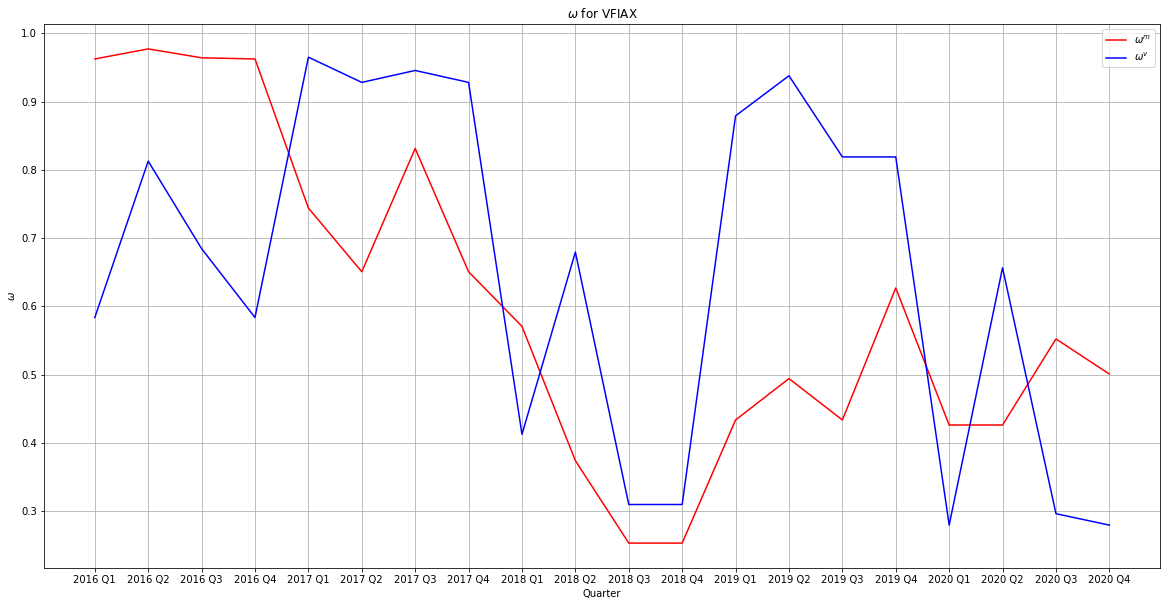

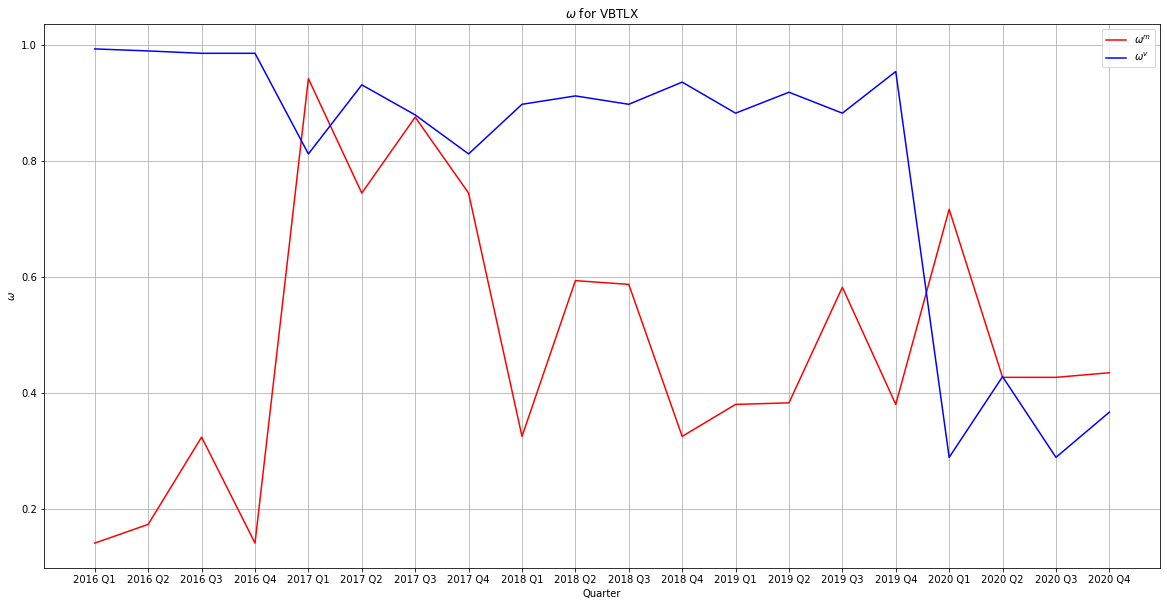

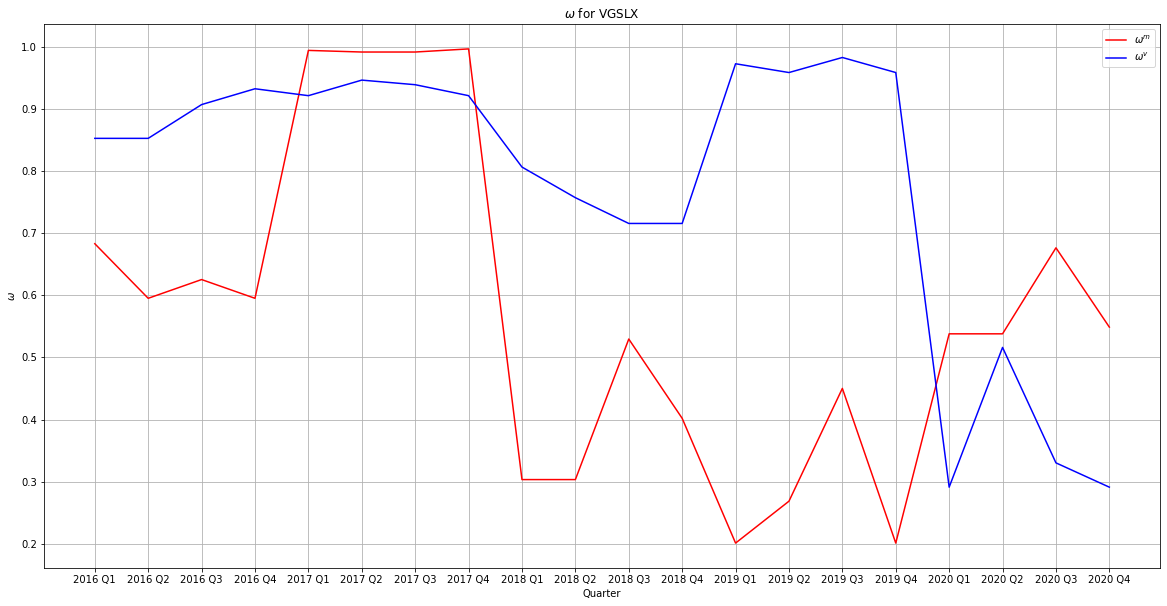

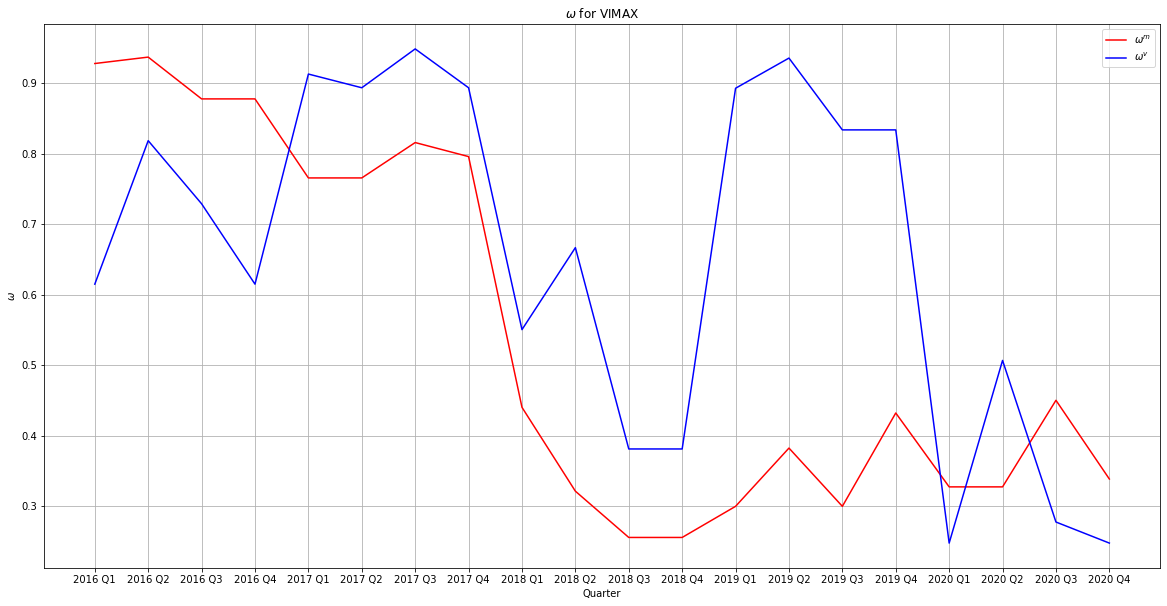

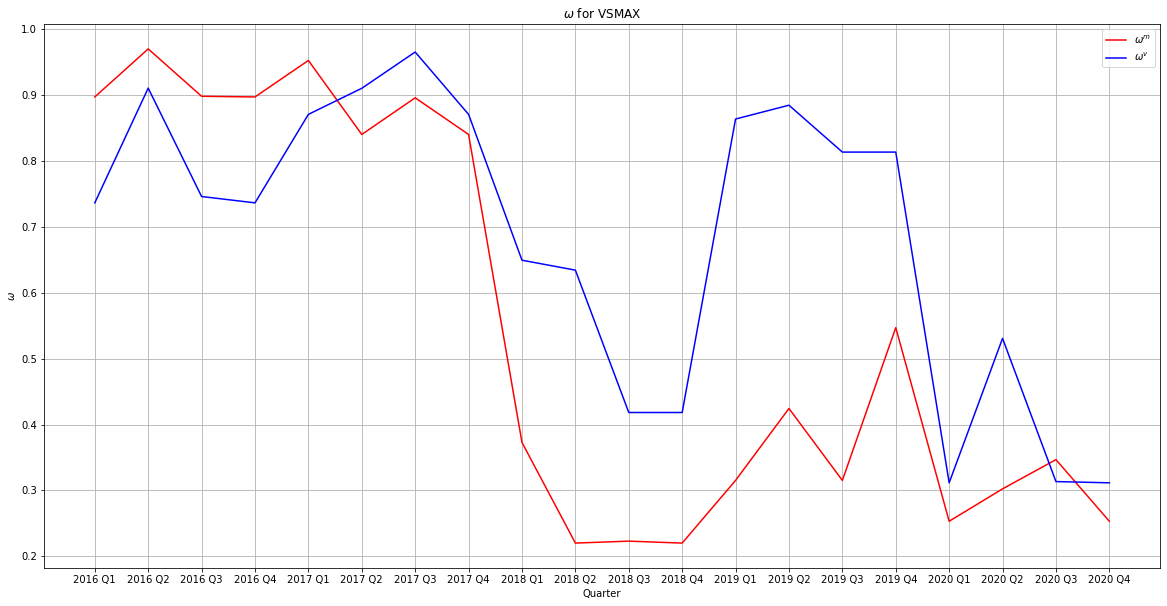

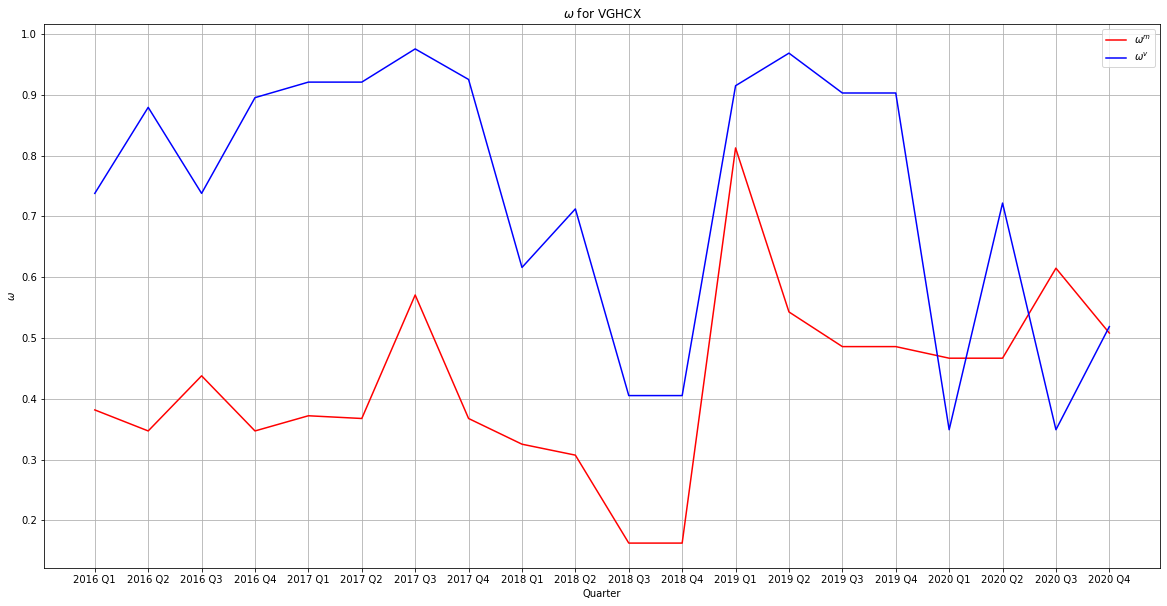

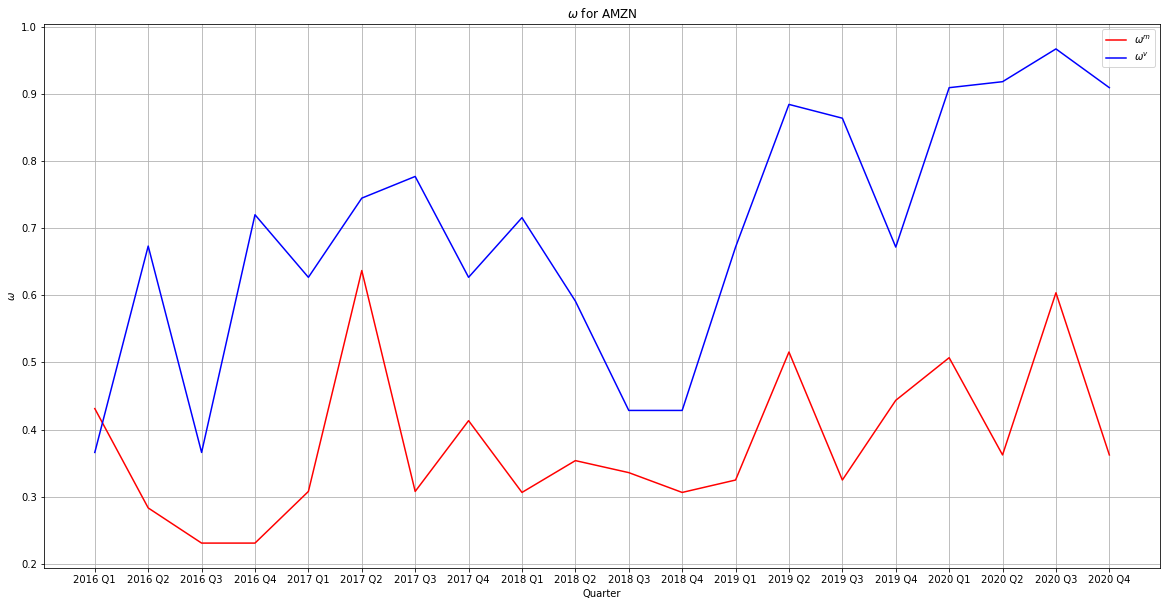

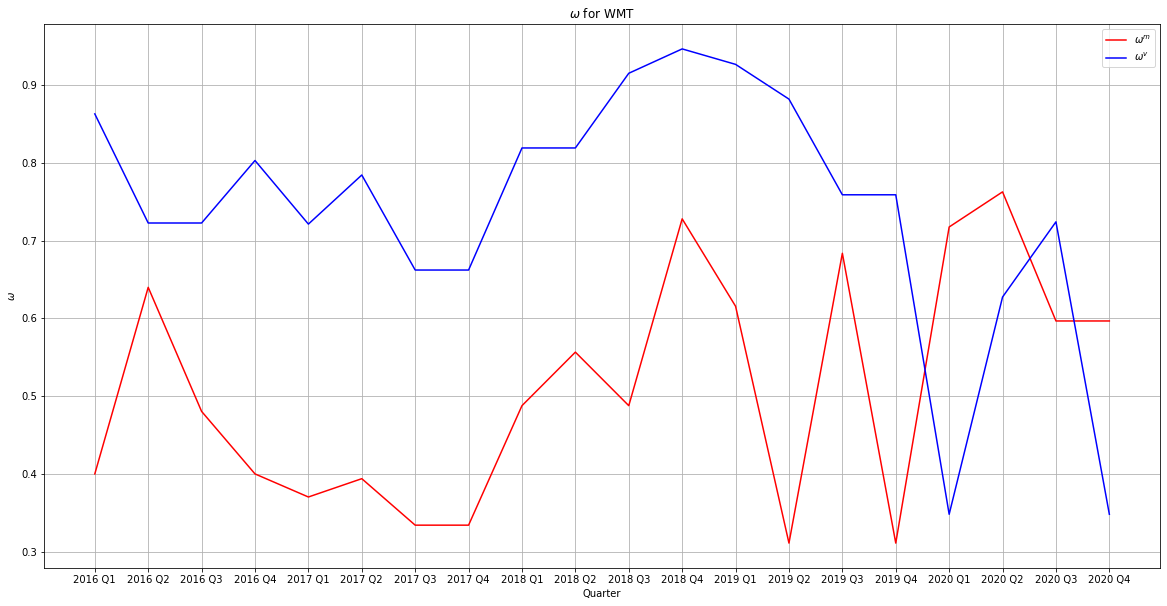

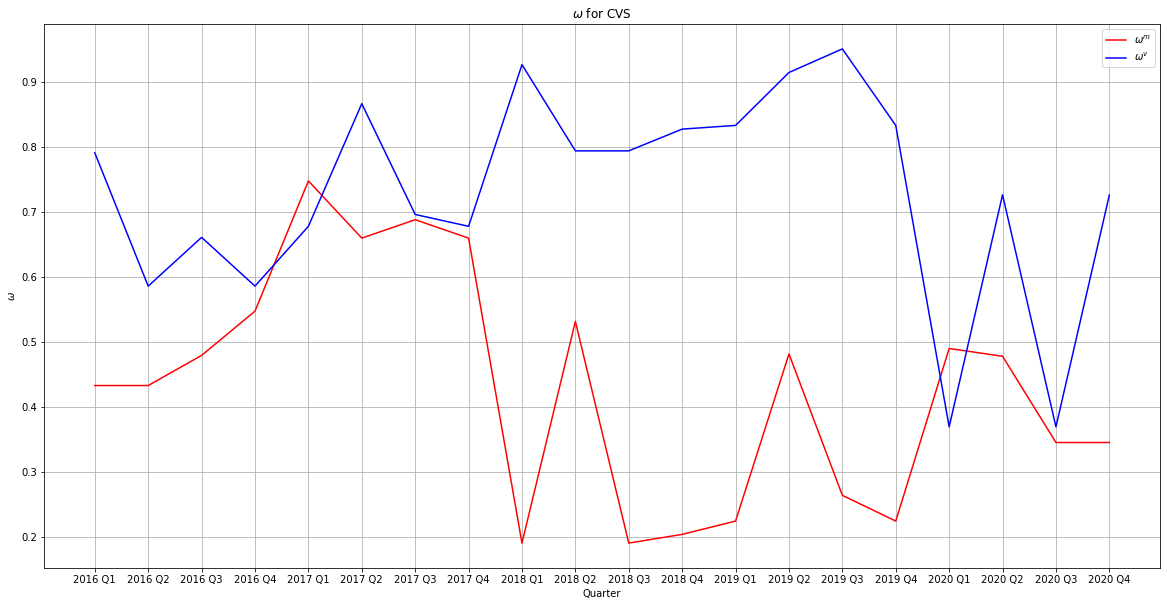

In [102]:

for asset_num, asset in enumerate(returns.columns):
    cur_asset = returns[asset]
    plt.figure(num=asset_num, figsize=(20,10))

    x_labels = []
    omega_m_values = []
    omega_v_values = []

    for (year_start, year_end) in years:
        cur_year = year_start[:4]
        cur_year_returns = cur_asset[year_start:year_end]
        
        quarter_stats = []

        for quarter_index, (q_start, q_end) in enumerate(quarters):

            cur_quarter_returns = cur_asset[cur_year + q_start:cur_year + q_end]
            
            m1 = cur_quarter_returns.mean()
            v1 = cur_quarter_returns.var()
            D1 = len(cur_quarter_returns)

            quarter_stats.append((m1,v1,D1))
        
        
        for quarter_index, (m1,v1,D1) in enumerate(quarter_stats):

            other_quarters = [quarter_stats[j] for j in range(len(quarters)) if j != quarter_index]
            
            omega_m = 1
            omega_v = 1
            
            for (m2, v2, D2) in other_quarters:
                omega_m = min(omega_m, 1/(1 + (m1 - m2)**2/(v1/D1 + v2/D2)))
                omega_v = min(omega_v, (4*v1*v2)/(v1+v2)**2)
            
            x_labels.append(cur_year + ' Q' + str(quarter_index+1))
            omega_m_values.append(omega_m)
            omega_v_values.append(omega_v)

    plt.plot(x_labels, omega_m_values, 'r', label='$\omega^m$')
    plt.plot(x_labels, omega_v_values, 'b', label='$\omega^v$')
    plt.title('$\omega$ for ' + asset)
    plt.ylabel('$\omega$')
    plt.xlabel('Quarter')
    plt.legend()
    plt.grid()
    plt.show()
        

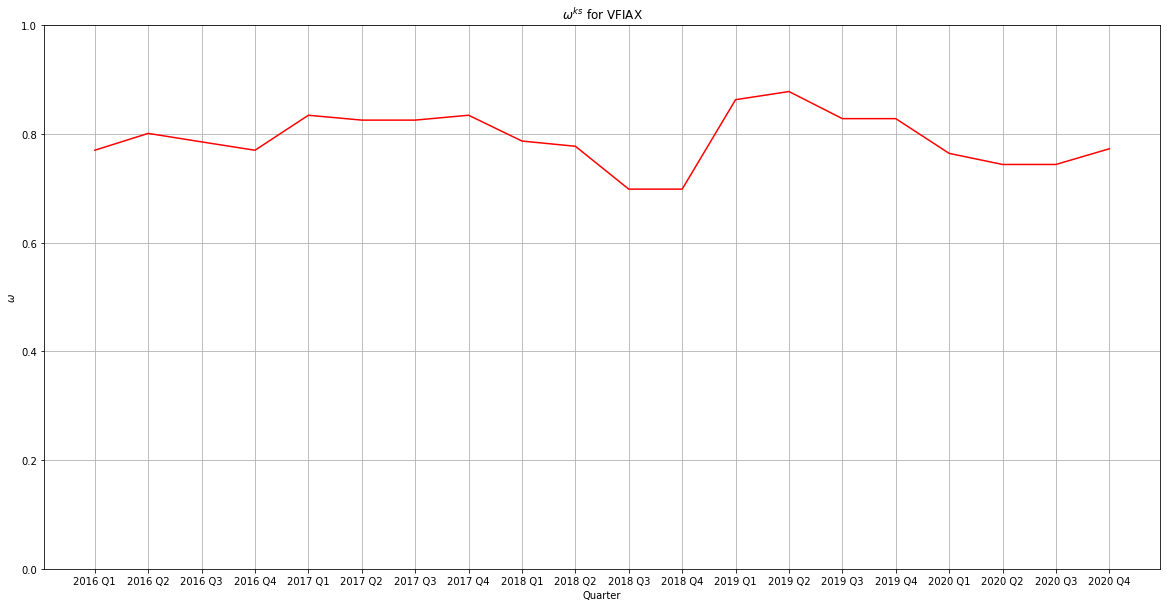

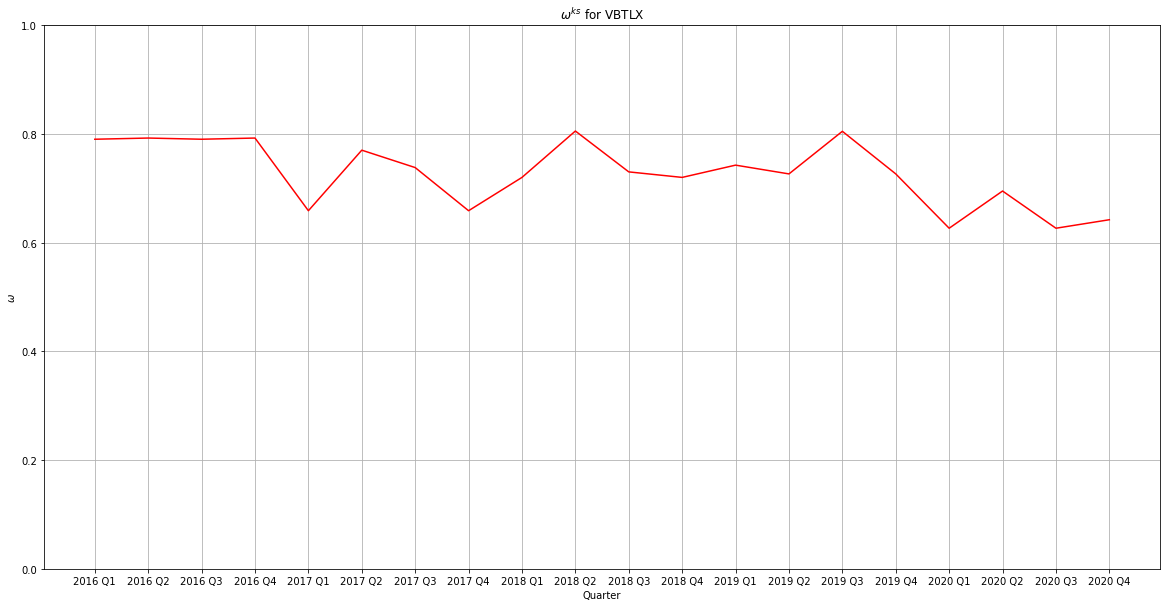

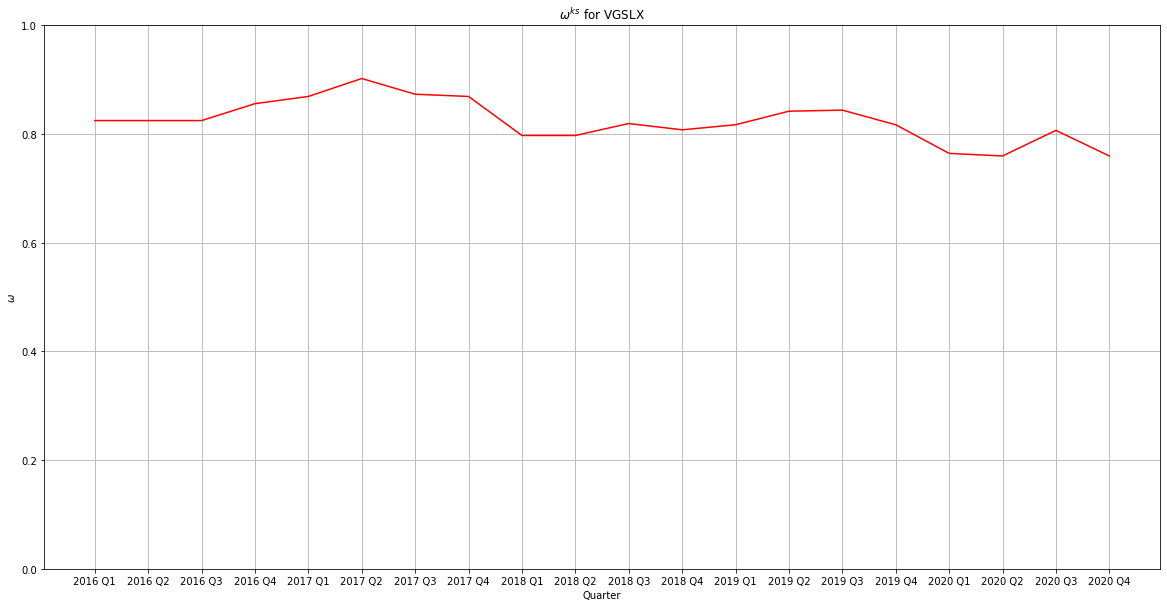

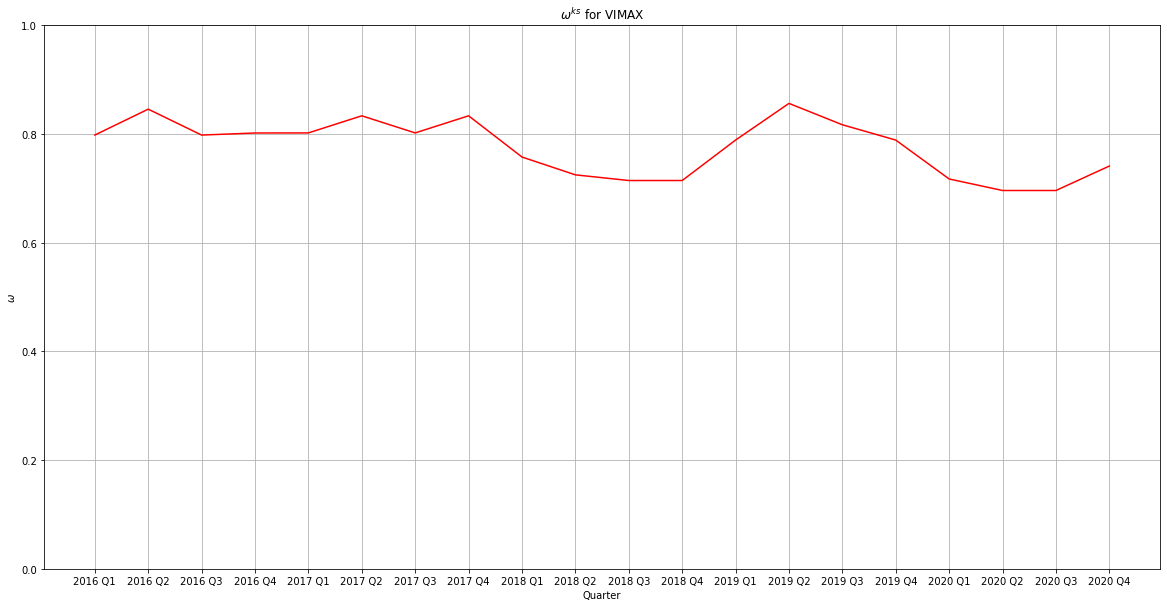

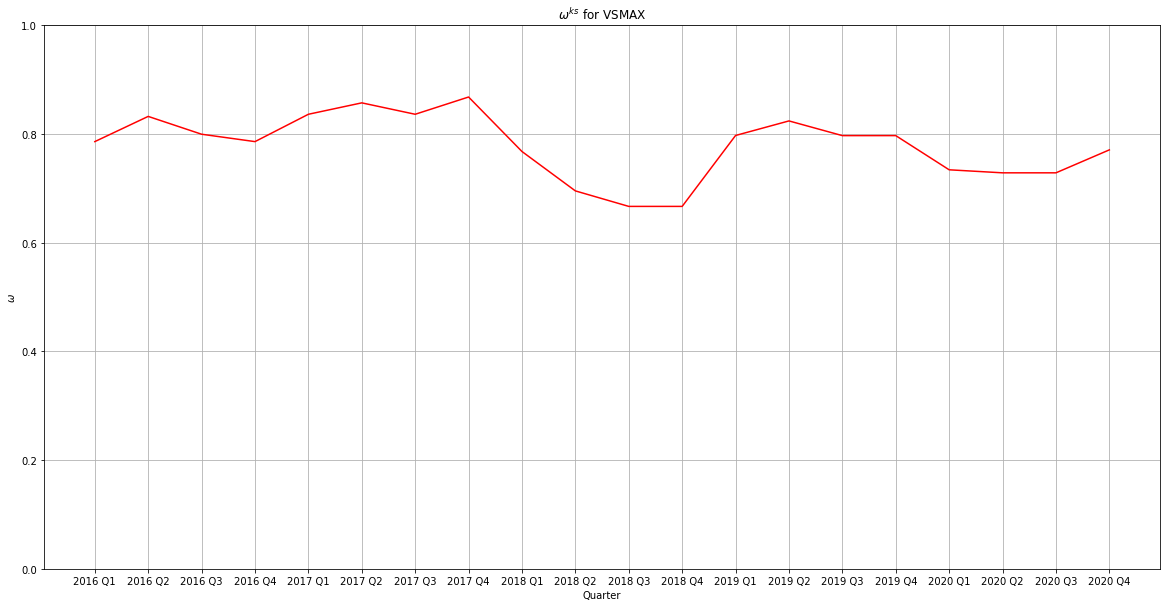

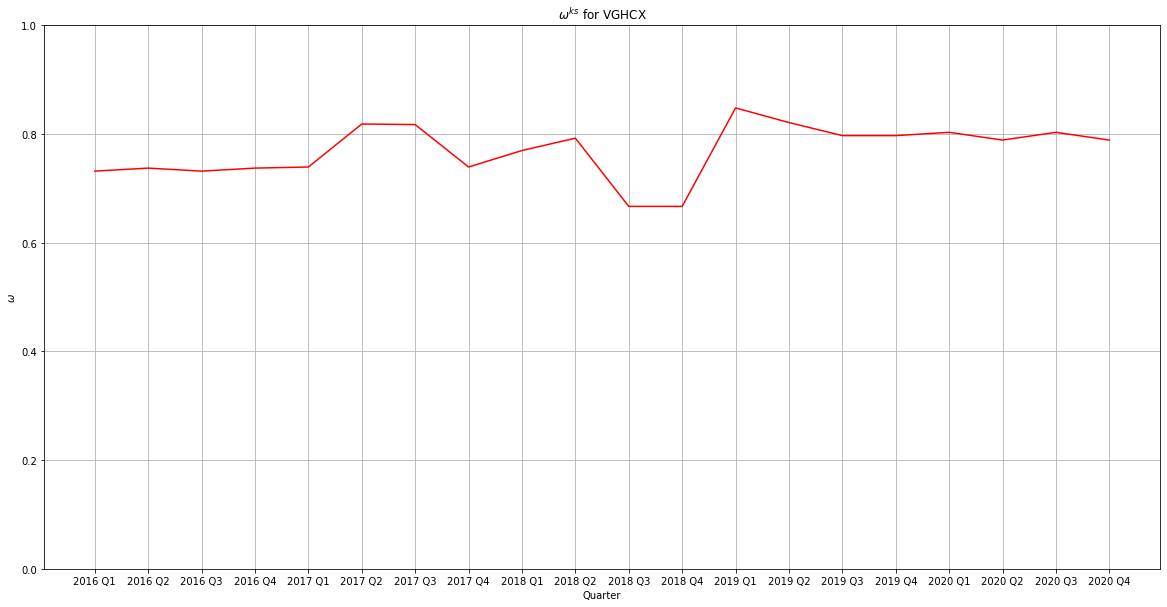

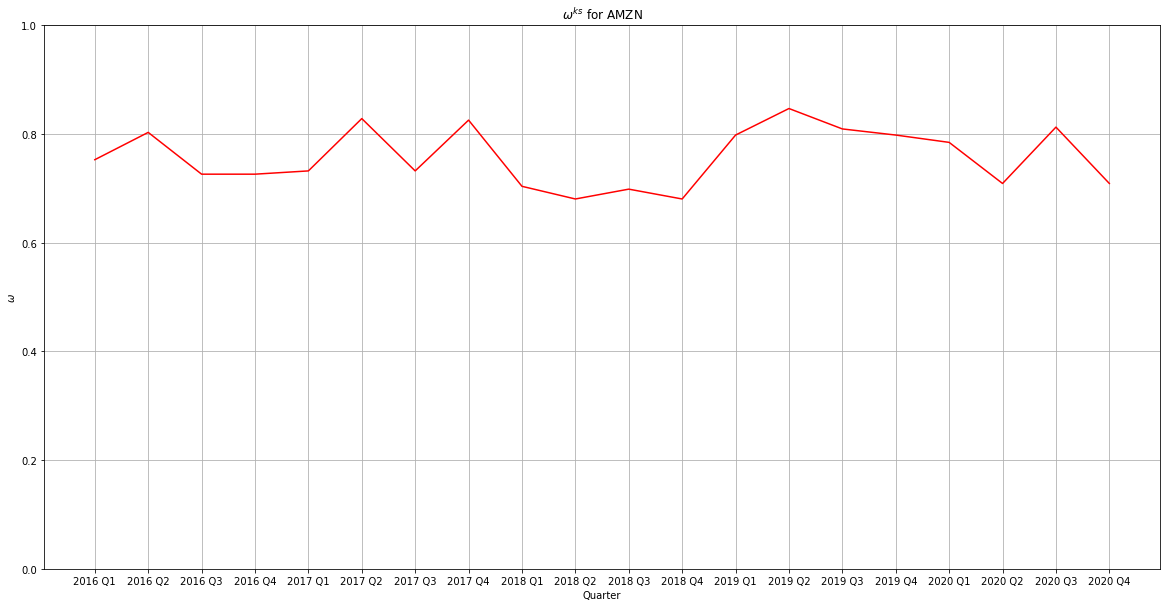

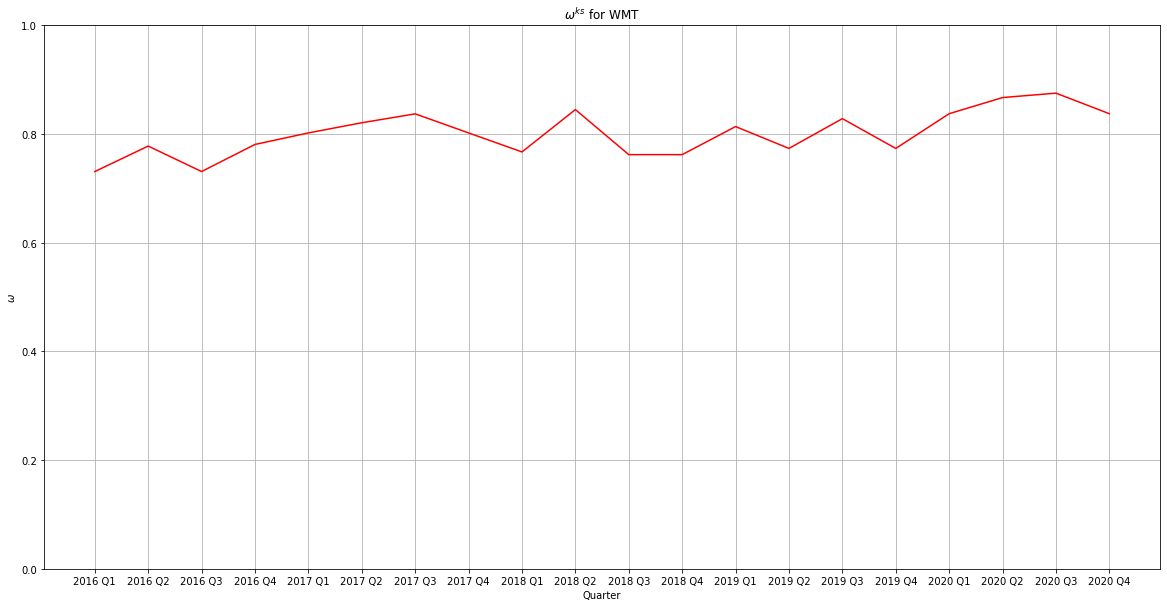

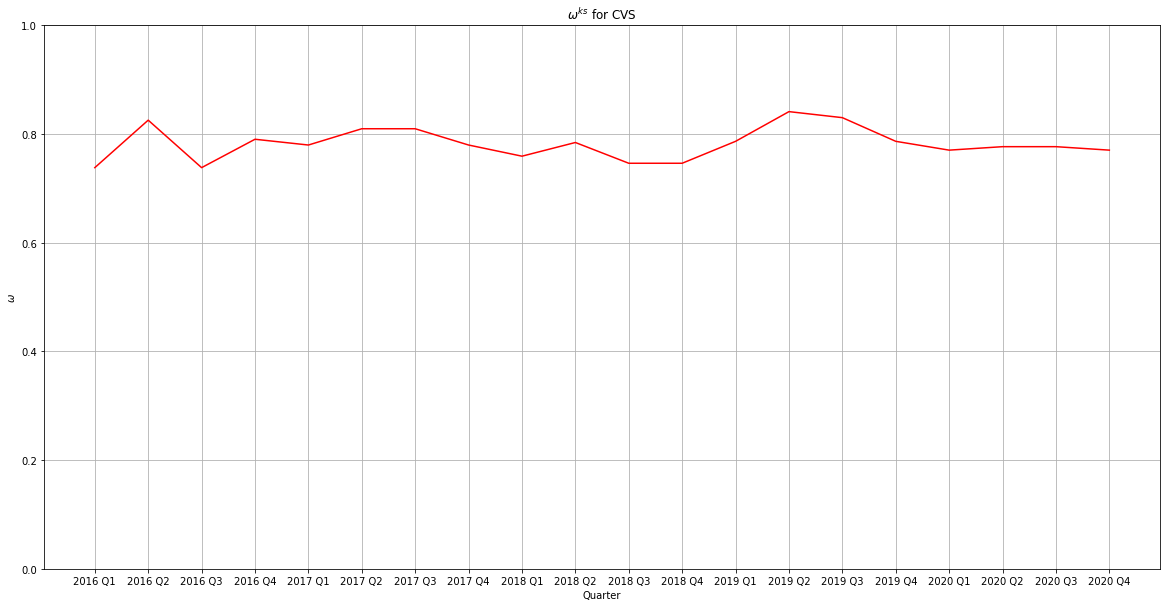

In [103]:
from scipy import stats

for asset_num, asset in enumerate(returns.columns):
    cur_asset = returns[asset]
    plt.figure(num=asset_num, figsize=(20,10))

    x_labels = []
    ks_values = []

    for (year_start, year_end) in years:
        cur_year = year_start[:4]
        cur_year_returns = cur_asset[year_start:year_end]
        
        for quarter_index, (q_start, q_end) in enumerate(quarters):

            cur_quarter_returns = cur_asset[cur_year + q_start:cur_year + q_end]

            other_quarters = [q for j, q in enumerate(quarters) if j != quarter_index]

            ks_val = 0
            
            for other_q_start, other_q_end in other_quarters:
                other_quarter_returns = cur_asset[cur_year + other_q_start:cur_year + other_q_end]
                ks_val = max(ks_val, stats.ks_2samp(cur_quarter_returns, other_quarter_returns)[0])

            x_labels.append(cur_year + ' Q' + str(quarter_index+1))
            ks_values.append(1-ks_val)

    plt.plot(x_labels, ks_values, 'r')
    plt.title('$\omega^{ks}$ for ' + asset)
    plt.ylabel('$\omega$')
    plt.xlabel('Quarter')
    plt.ylim((0,1))
    plt.grid()
    plt.show()

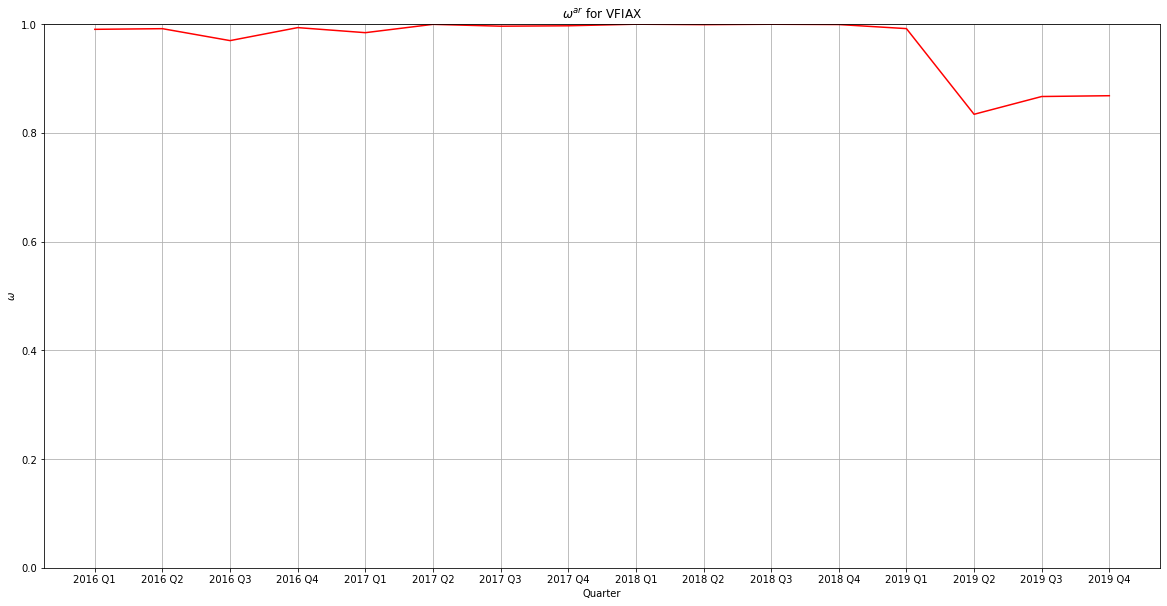

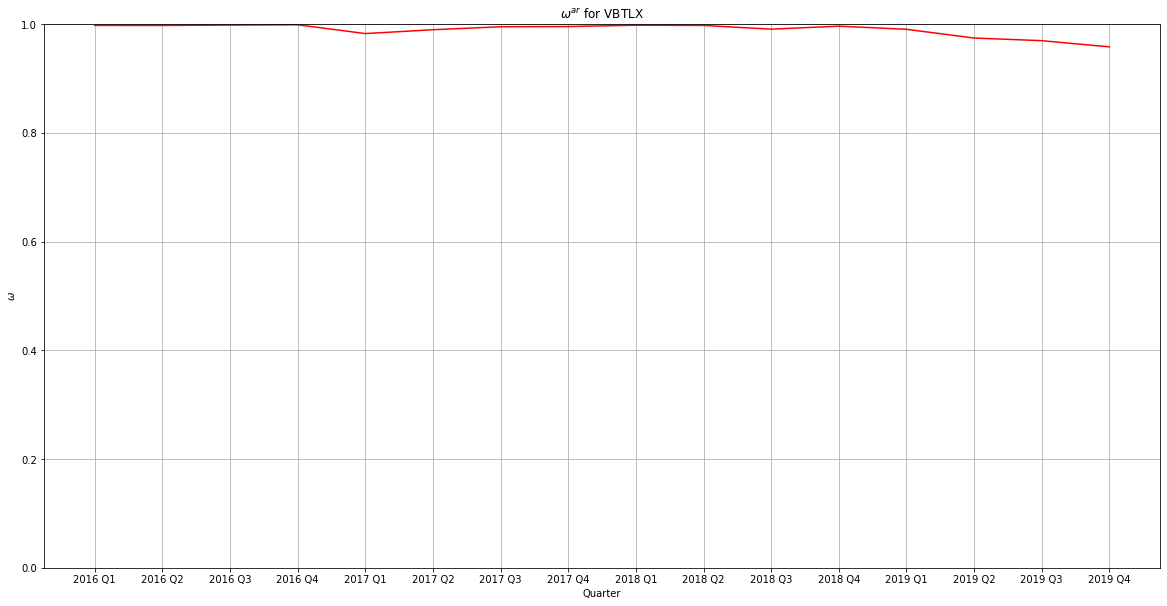

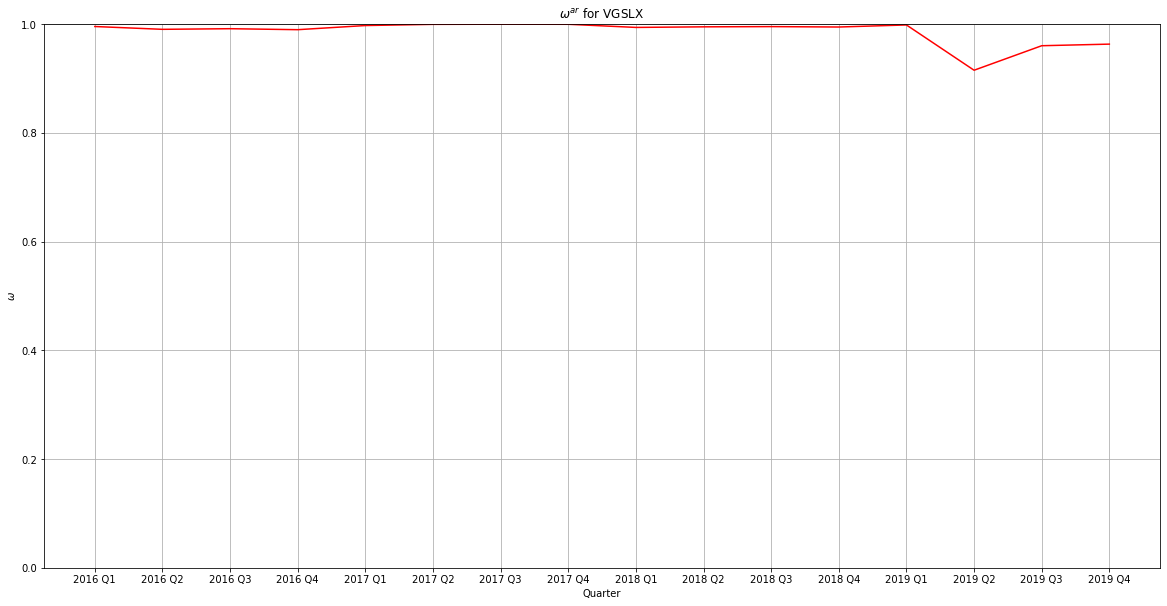

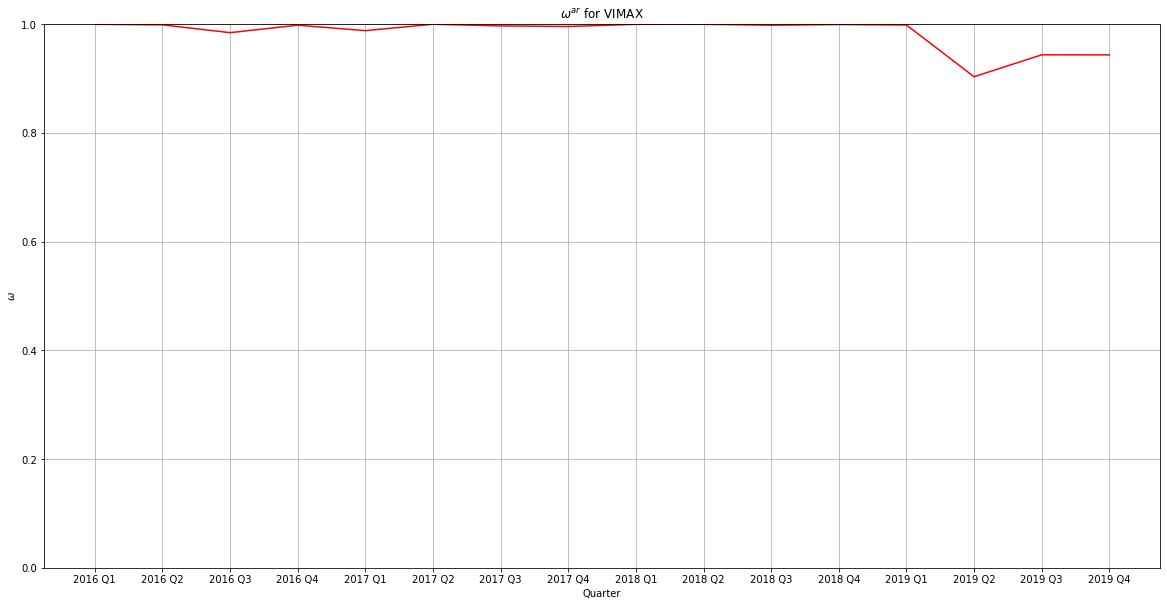

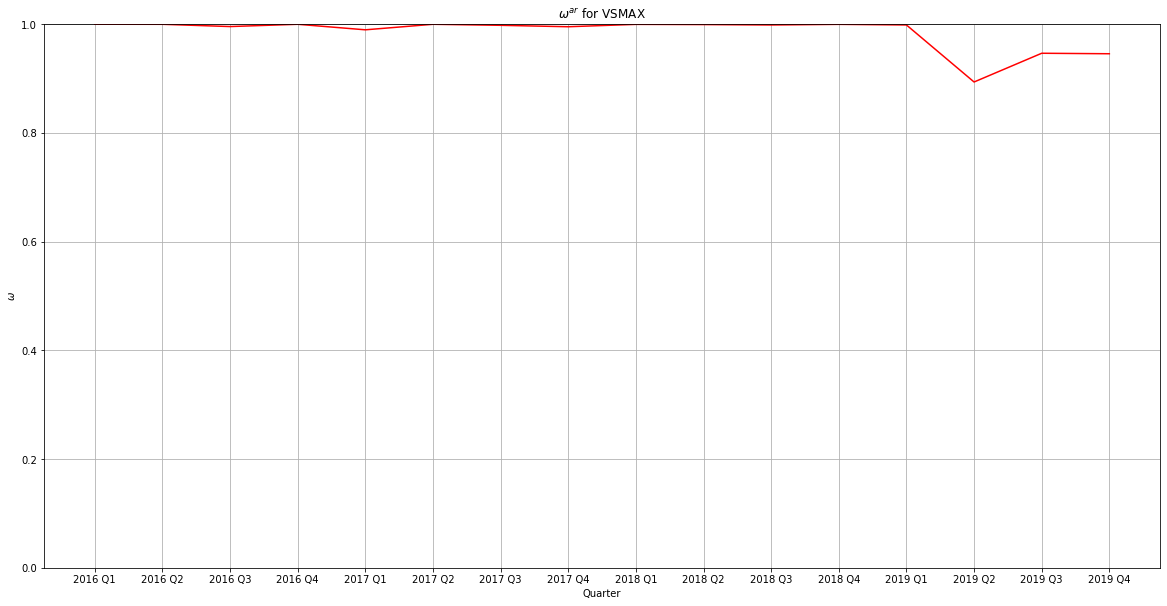

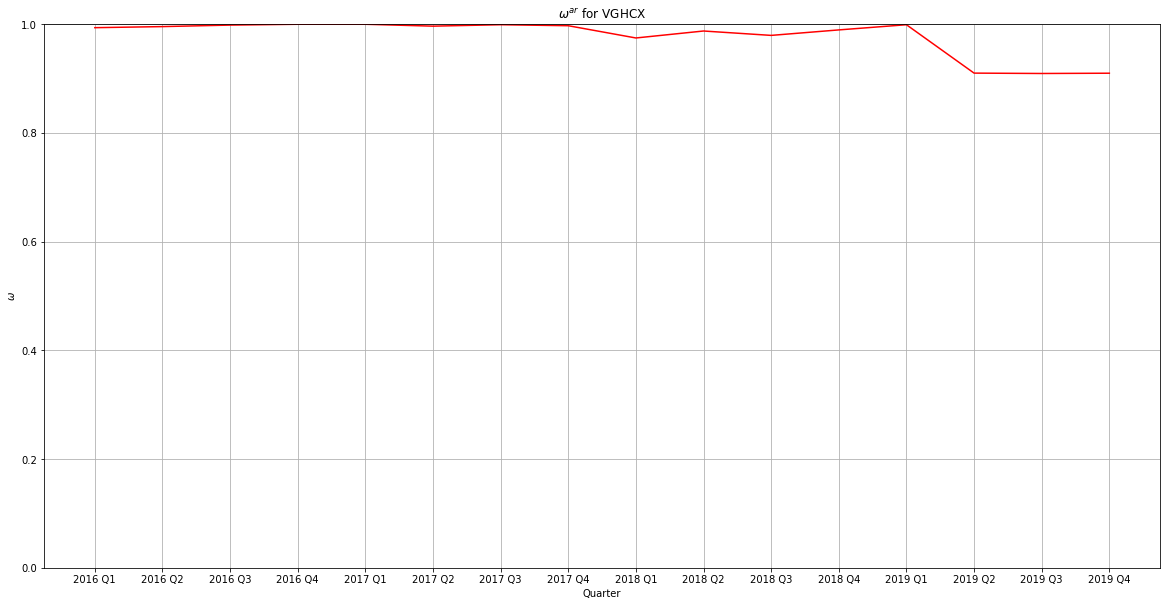

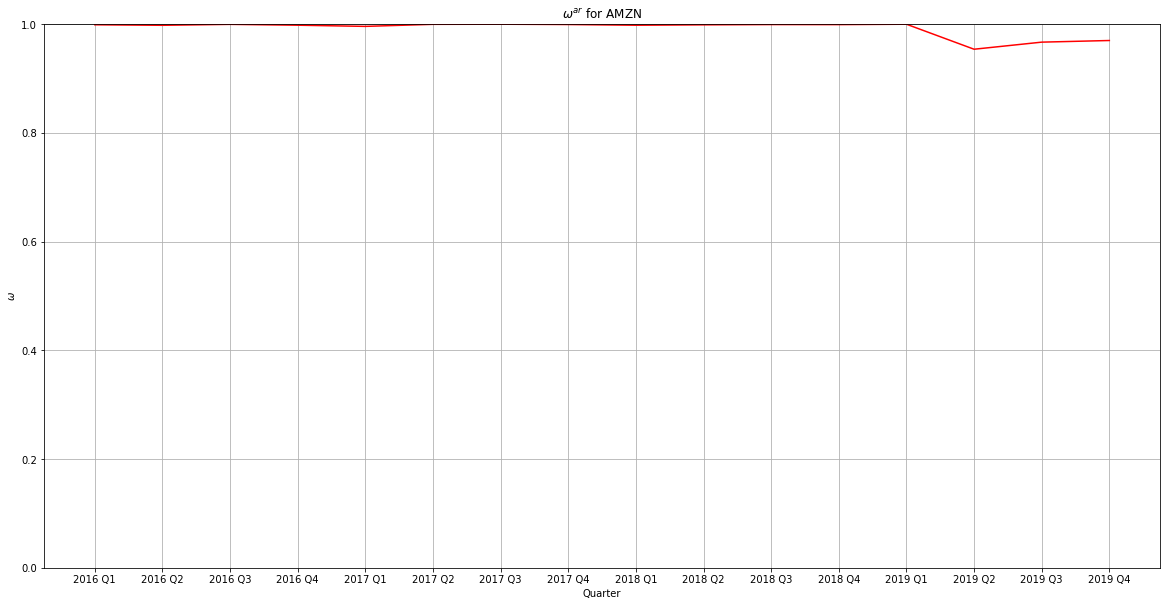

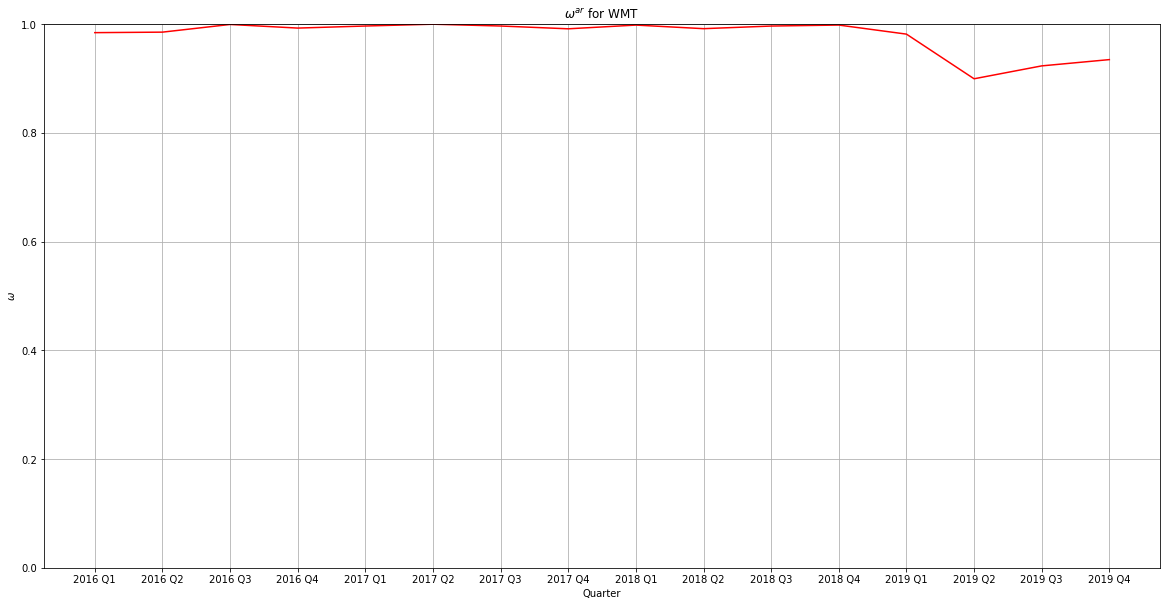

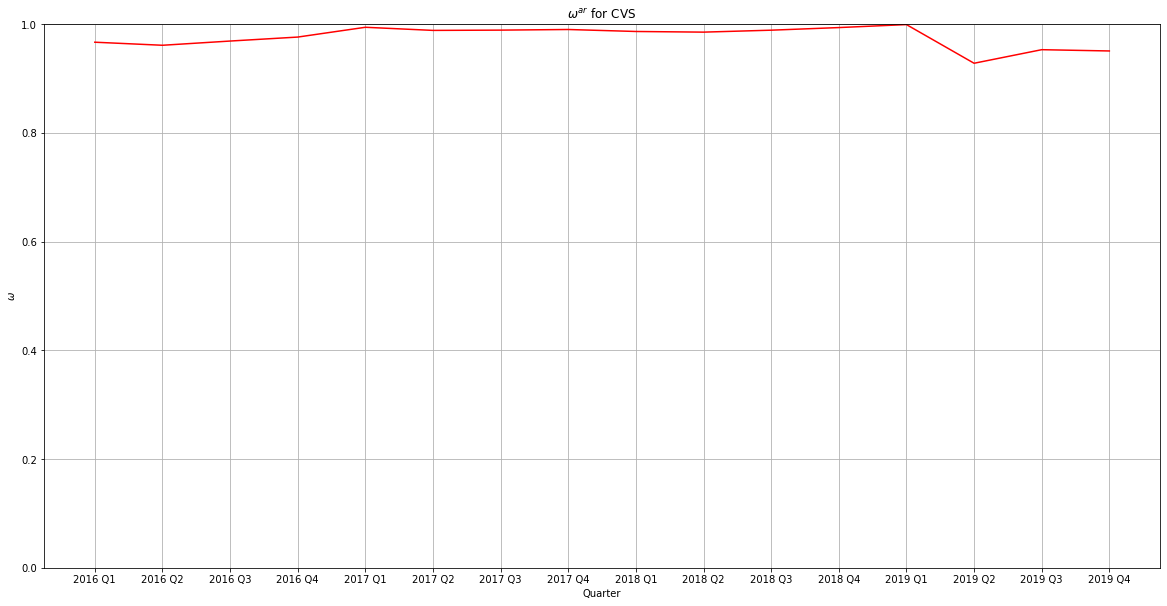

In [36]:
for asset_num, asset in enumerate(returns.columns):
    cur_asset = returns[asset]
    plt.figure(num=asset_num, figsize=(20,10))

    x_labels = []
    ar_values = []
    ac_values = []

    for (year_start, year_end) in years[:-1]:
        cur_year = year_start[:4]
        for quarter_index, (q_start, q_end) in enumerate(quarters):
            year_diff = 1

            if quarter_index == 0:
                year_diff = 0

            period_start = cur_year + q_start
            period_end = str(int(cur_year) + year_diff) + quarters[quarter_index-1][1]

            cur_period = cur_asset[period_start:period_end]

            m0 = cur_period.iloc[1:].mean()
            m1 = cur_period.iloc[:-1].mean()

            v00 = 0
            v10 = 0
            v11 = 0

            for day_return in cur_period.iloc[1:]:
                v00 += (day_return - m0)**2
            
            for day_return in cur_period.iloc[:-1]:
                v11 += (day_return - m1)**2
            
            for day in range(1, len(cur_period)):
                v10 += (cur_period.iloc[day-1] - m0)*(cur_period.iloc[day] - m1) 


            v11 = v11/len(cur_period)
            v10 = v10/len(cur_period)
            v00 = v00/len(cur_period)
            
            omega_ar = 1 - (v10**2)/(v00*v11)

            x_labels.append(cur_year + ' Q' + str(quarter_index+1))
            ar_values.append(omega_ar)

    plt.plot(x_labels, ar_values, 'r')
    plt.title('$\omega^{ar}$ for ' + asset)
    plt.ylabel('$\omega$')
    plt.xlabel('Quarter')
    plt.ylim((0,1))
    plt.grid()
    plt.show()

### The data is plotted so the x value is equal to the year and quarter that starts the year the data was taken from (2017 Q1 means 2017 Q1-Q4 used to calculate value)